### Data Visualization

#1 Preprocessing phase.
After importing the dataset using Pandas start by showing the head of the dataset then some general information about the data columns and values.

As a next step, apply what you have learned in the course to preprocess your data: find missing information and replace it with the appropriate values.

Verify that your data is ready to be treated.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('titanic-passengers.csv', sep=";")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
data.index

RangeIndex(start=0, stop=891, step=1)

In [4]:
data.shape

(891, 12)

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.dropna(how="all").shape
# There is no entier row with missing values

(891, 12)

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# We replace the missing ages with mean value
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [11]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
# We replace the missing values in 'Embarked' with 'S' Because its the majority
data['Embarked'].fillna(value='S', inplace=True)

In [14]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [15]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [16]:
survived_num = data['Survived'].value_counts()
survived_num

No     549
Yes    342
Name: Survived, dtype: int64

In [17]:
percentage_survived = survived_num*100/len(data)
percentage_survived

No     61.616162
Yes    38.383838
Name: Survived, dtype: float64

In [18]:
classe_distribution = data['Pclass'].value_counts()
classe_distribution

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [19]:
sex_distribution = data['Sex'].value_counts()
sex_distribution

male      577
female    314
Name: Sex, dtype: int64

### 2. Visualization phase:

Start by studying the distribution of the most important features based on your understanding of the dataset and the problem.

Visualize the correlation between Sex and Age in a plot of your choosing. The visualized plot should give us obvious deductions concerning the importance of age and sex in the survival of the individuals.

Pick two other features and study their impact on the survival of the individuals.

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

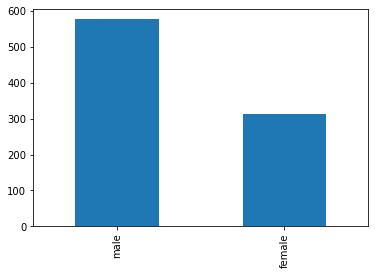

In [21]:
# Bar plot of Sex
genderplot = data['Sex'].value_counts().plot.bar()

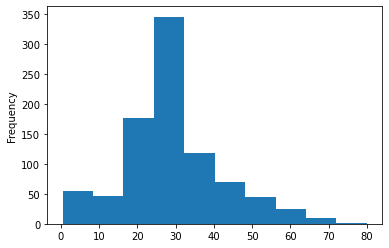

In [22]:
# Histogram for age
histplot = data['Age'].plot.hist()
plt.xlabel='Age'

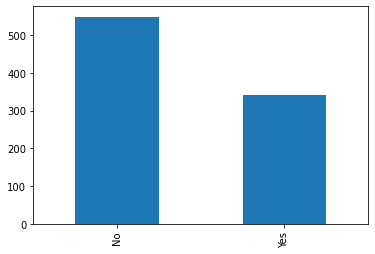

In [23]:
survived_plot = survived_num.plot.bar()

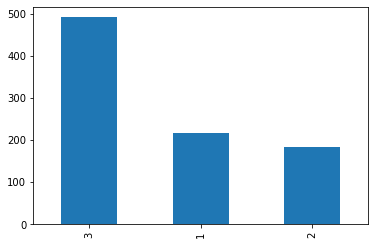

In [24]:
class_plot = classe_distribution.plot.bar()

In [25]:
survived_category = data['Survived'] == 'Yes'
Not_survived_category = data['Survived'] == 'No'

<AxesSubplot:>

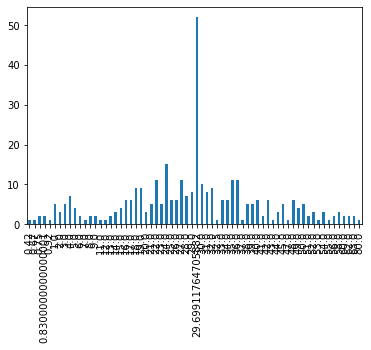

In [27]:
# Survived passengers relation with age
data[survived_category]['Age'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

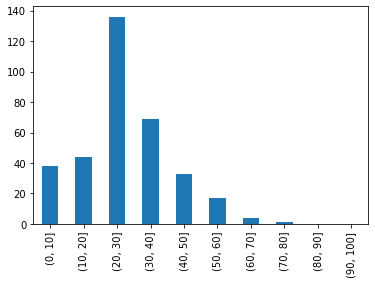

In [28]:
# Survived by age
# It is not clear, we need to adjust x values
bins = [0,10,20,30,40,50,60,70,80,90,100]

data['bins'] = pd.cut(data['Age'], bins)

data[survived_category]['bins'].value_counts().sort_index().plot.bar()

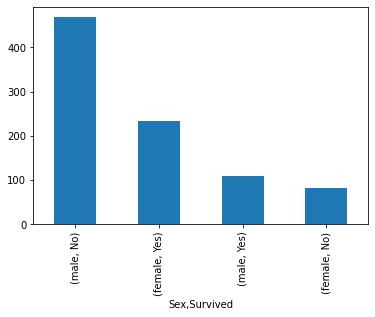

In [29]:
df3 = data[['Sex','Survived']]
df3.value_counts().plot(kind='bar')
plt.show()

<AxesSubplot:>

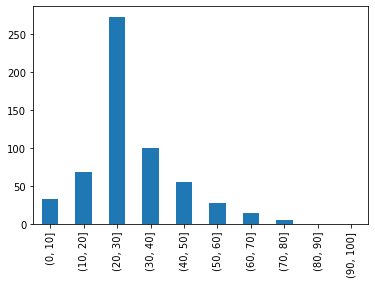

In [30]:
# Correlation between sex and age
# for males
data[data['Sex']=='male']['bins'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

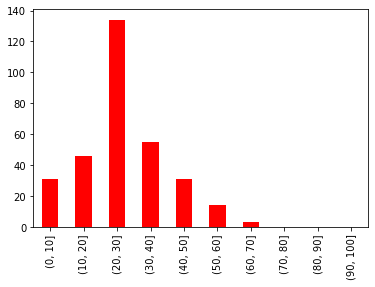

In [31]:
# for females
data[data['Sex']=='female']['bins'].value_counts().sort_index().plot.bar(color = 'r')

In [32]:
data["Cabin"].unique()

array([nan, 'F G73', 'B71', 'C82', 'C93', 'B41', 'C95', 'B38', 'C52',
       'A32', 'C111', 'C2', 'E101', 'D17', 'B22', 'B3', 'C45', 'B78',
       'A31', 'C128', 'C30', 'A26', 'C22 C26', 'D15', 'T', 'C54', 'C103',
       'C125', 'D20', 'C78', 'E24', 'B82 B84', 'E12', 'D9', 'D28', 'D19',
       'G6', 'D48', 'C90', 'D56', 'E33', 'B86', 'F2', 'B77', 'B39', 'F33',
       'D26', 'C85', 'A34', 'C92', 'F G63', 'D45', 'D', 'C91', 'B79',
       'D21', 'C32', 'C83', 'C47', 'B58 B60', 'E38', 'B28', 'E58', 'A16',
       'B20', 'C126', 'E77', 'B96 B98', 'C65', 'C123', 'C68', 'B35', 'B5',
       'C46', 'E10', 'B51 B53 B55', 'E68', 'B49', 'B30', 'F E69',
       'D10 D12', 'B57 B59 B63 B66', 'D11', 'D36', 'C99', 'D7',
       'C23 C25 C27', 'C106', 'B19', 'C124', 'E8', 'A23', 'A10', 'E31',
       'B73', 'B18', 'E46', 'D50', 'F38', 'B37', 'A7', 'A5', 'E67', 'D33',
       'C118', 'C7', 'A36', 'C62 C64', 'E34', 'D6', 'A6', 'B101', 'E44',
       'C70', 'A20', 'E121', 'C87', 'C50', 'B4', 'C104', 'C148', 'A1

In [35]:
cabinC = data["Cabin"].value_counts().keys()[0]
data["Cabin"].fillna(cabinC,inplace = True)

In [37]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data["Cabin"])
cla = le.classes_
print(cla[63])
data["CabinEncoded"] = le.transform(data["Cabin"])

C23 C25 C27


In [38]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,bins,CabinEncoded
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,B96 B98,S,"(20, 30]",47
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,F G73,S,"(20, 30]",140
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,B96 B98,S,"(10, 20]",47
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,B96 B98,S,"(20, 30]",47
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,B71,S,"(30, 40]",38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,B96 B98,C,"(10, 20]",47
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,B96 B98,C,"(20, 30]",47
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,B96 B98,S,"(20, 30]",47
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,B96 B98,S,"(20, 30]",47


In [39]:
dicSurvived = {"No":0,"Yes":1}
data["Survived"].replace(dicSurvived,inplace=True)

In [40]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,bins,CabinEncoded
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,B96 B98,S,"(20, 30]",47
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,"(20, 30]",140
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,B96 B98,S,"(10, 20]",47
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,B96 B98,S,"(20, 30]",47
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,"(30, 40]",38


In [41]:
dicSex = {"male":1,"female":0}
data["Sex"].replace(dicSex,inplace=True)

In [42]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,bins,CabinEncoded
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,B96 B98,S,"(20, 30]",47
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,F G73,S,"(20, 30]",140
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,B96 B98,S,"(10, 20]",47
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,B96 B98,S,"(20, 30]",47
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,S,"(30, 40]",38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,B96 B98,C,"(10, 20]",47
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,B96 B98,C,"(20, 30]",47
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,B96 B98,S,"(20, 30]",47
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,B96 B98,S,"(20, 30]",47


In [45]:
df = pd.read_csv("titanic-passengers.csv",sep=";")
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"
    

                    }

In [46]:
titles = list(Title_Dictionary.keys())
columnTitle = []
for i, row in data.iterrows():
    for title in titles:
        titlee = title+"."
        if titlee in row["Name"]:
            columnTitle.append(title)
data["Title"] = columnTitle

In [49]:
data["Title"].replace(Title_Dictionary,inplace=True)

In [50]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,bins,CabinEncoded,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,B96 B98,S,"(20, 30]",47,Mrs
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S,"(20, 30]",140,Mrs
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,B96 B98,S,"(10, 20]",47,Mrs
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,B96 B98,S,"(20, 30]",47,Mrs
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S,"(30, 40]",38,Mrs


In [51]:
le = pd.get_dummies(data["Title"])
dfNew = le.join(data)
dfNew

,Master,Miss,Mrs,Officer,Royalty,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,bins,CabinEncoded,Title
0,0,0,1,0,0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,B96 B98,S,"(20, 30]",47,Mrs
1,0,0,1,0,0,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,F G73,S,"(20, 30]",140,Mrs
2,0,0,1,0,0,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,B96 B98,S,"(10, 20]",47,Mrs
3,0,0,1,0,0,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,B96 B98,S,"(20, 30]",47,Mrs
4,0,0,1,0,0,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,S,"(30, 40]",38,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,0,0,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,B96 B98,C,"(10, 20]",47,Mrs
887,0,0,1,0,0,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,B96 B98,C,"(20, 30]",47,Mrs
888,0,1,0,0,0,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,B96 B98,S,"(20, 30]",47,Miss
889,0,0,1,0,0,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,B96 B98,S,"(20, 30]",47,Mrs


In [52]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

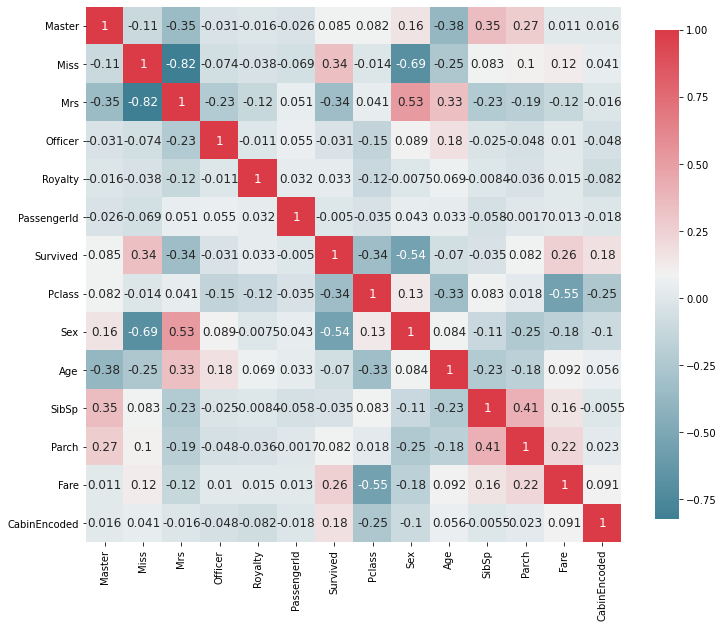

In [53]:
plot_correlation_map(dfNew)

Use the groupby function combined with the mean() to view the relation between Pclass and survived 


In [75]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,bins
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S,"(20, 30]"
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,"(20, 30]"
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S,"(10, 20]"
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,"(20, 30]"
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S,"(30, 40]"


In [55]:
corr1 = data.groupby(['Survived','Pclass']).mean()
corr1

PassengerId       Sex        Age     SibSp     Parch  \
Survived Pclass                                                         
0        1        410.300000  0.962500  40.896074  0.287500  0.300000   
         2        452.123711  0.938144  33.266947  0.319588  0.144330   
         3        453.580645  0.806452  27.417500  0.672043  0.384409   
1        1        491.772059  0.330882  34.784615  0.492647  0.389706   
         2        439.080460  0.195402  26.076166  0.494253  0.643678   
         3        394.058824  0.394958  23.232689  0.436975  0.420168   

                      Fare  CabinEncoded  
Survived Pclass                           
0        1       64.684008     60.200000  
         2       19.412328     49.329897  
         3       13.669364     48.532258  
1        1       95.608029     65.698529  
         2       22.055700     58.770115  
         3       13.694887     51.176471

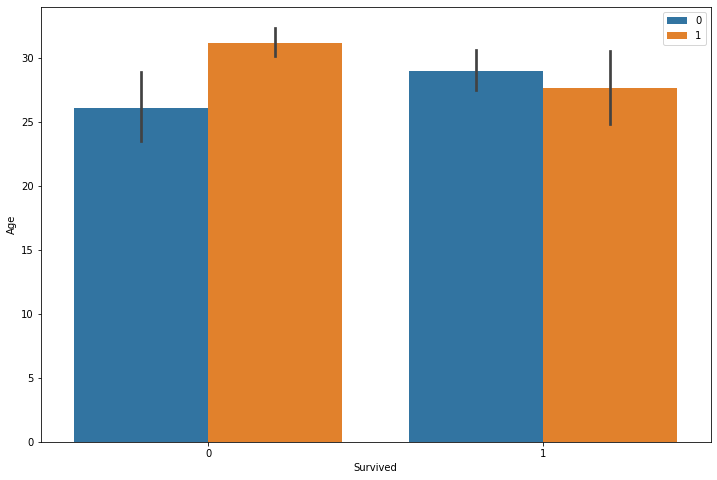

In [86]:
# Correlation between age and sex

plt.figure(figsize=(12, 8))

sns.barplot(data=dfNew,x="Survived",y="Age", hue='Sex')
plt.legend()